In [5]:
import tensorflow as tf
import keras
import random
import collections
import numpy as np
import matplotlib.pyplot as plt

There are 60000 images in training dataset
There are 10000 images in testing dataset
___________________
Randomly printing 10 images with labels from training dataset
index: 39775
Label: 0


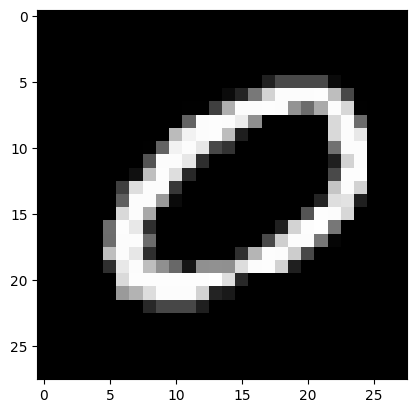

index: 16455
Label: 1


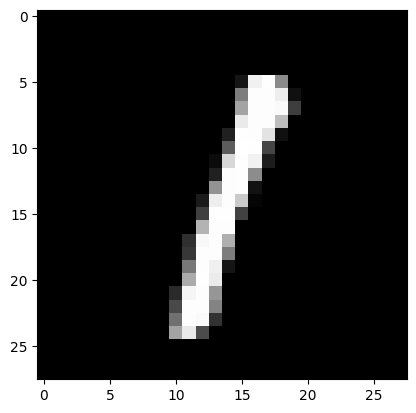

index: 48435
Label: 3


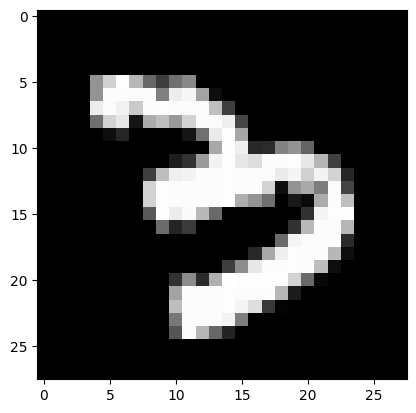

index: 35976
Label: 5


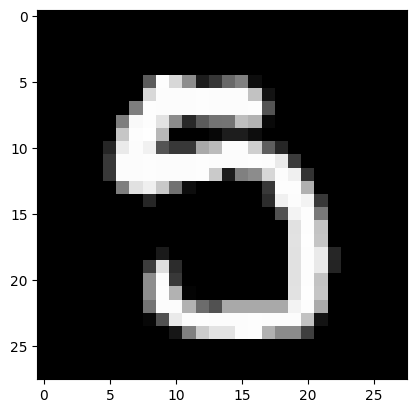

index: 11591
Label: 7


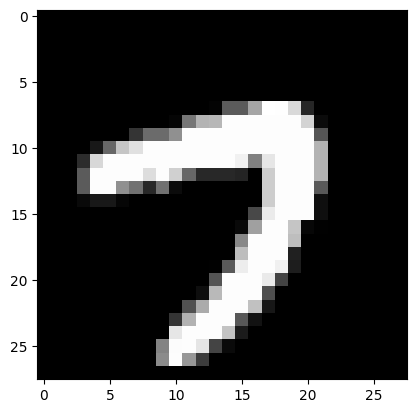

index: 44935
Label: 1


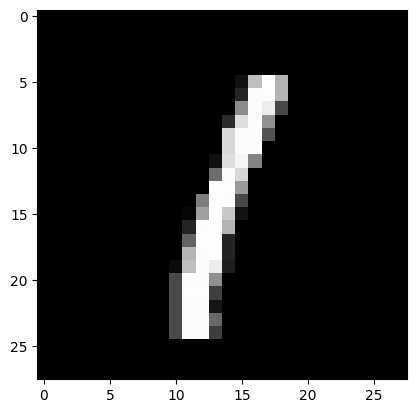

index: 8622
Label: 4


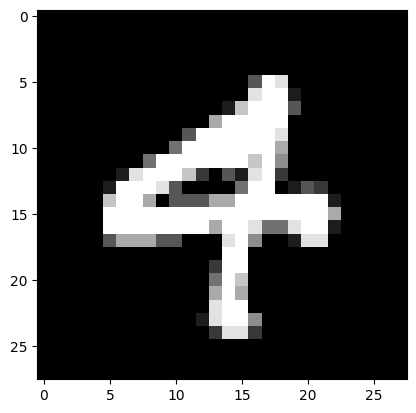

index: 25190
Label: 5


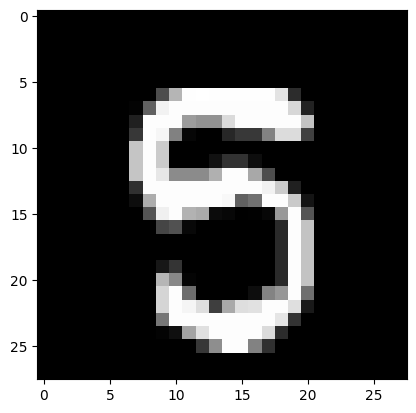

index: 20063
Label: 4


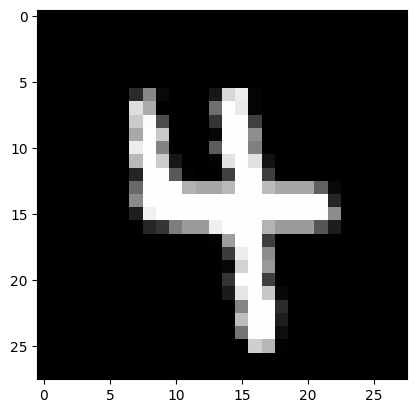

index: 2158
Label: 6


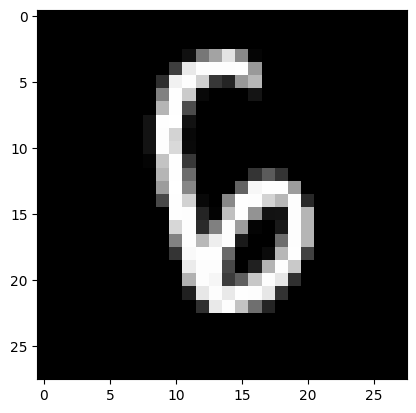

___________________
Randomly printing 10 images with labels from testing dataset
index: 4977
Label: 1


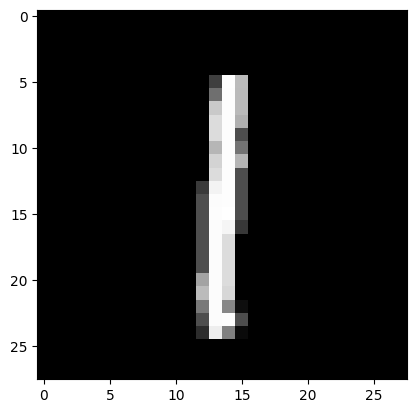

index: 1696
Label: 2


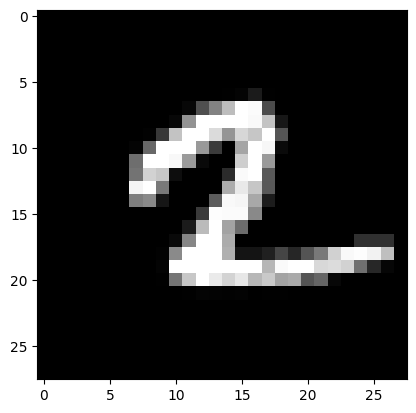

index: 5048
Label: 7


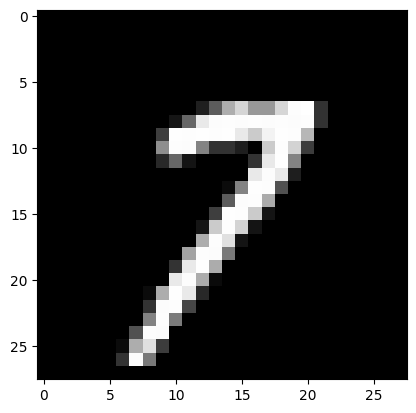

index: 5342
Label: 0


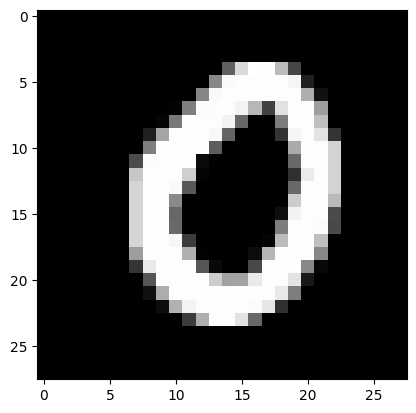

index: 5577
Label: 4


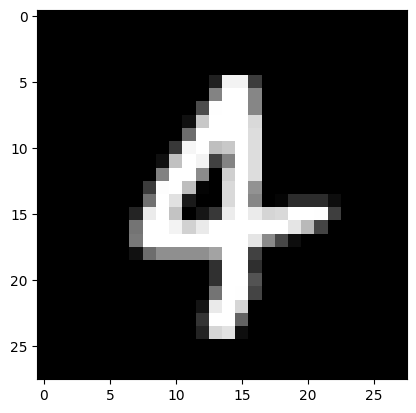

index: 2680
Label: 4


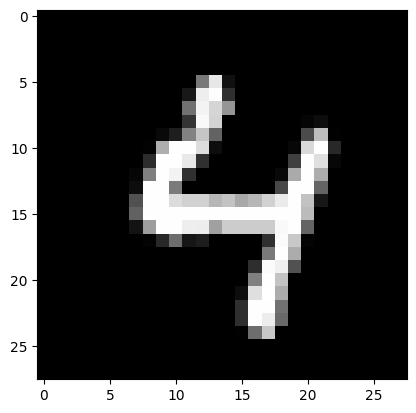

index: 100
Label: 6


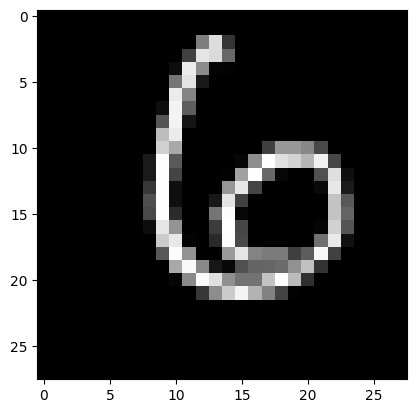

index: 2389
Label: 8


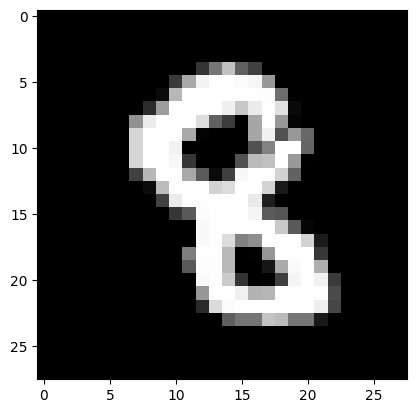

index: 951
Label: 5


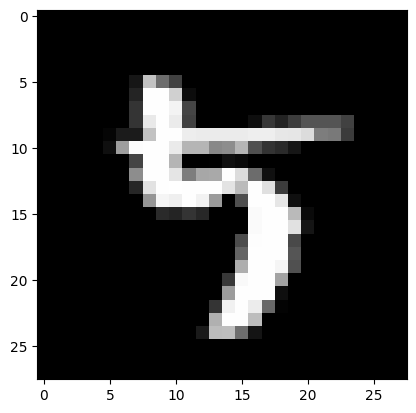

index: 8744
Label: 6


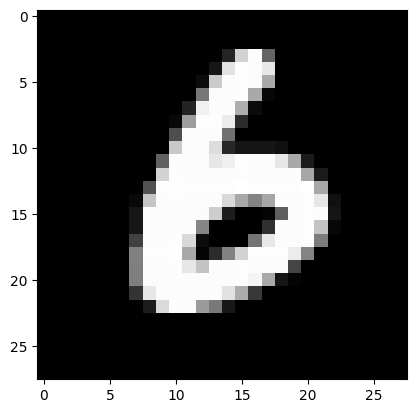

___________________
There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in testing dataset for 10000 images in testing dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

__________


In [11]:
def display_random_images_with_labels(d, n=10):
    """
        accept dataset in tuple form, first index
        is np arrays (images) and second is labels
        and display n random images with labels
        from it
        Inputs:
            d (tuple): dataset images, dataset labels on same indexs
            n (int): number of samples to display (default: 10)
        Output:
            None
    """
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Label:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()
# Dataset

# Loading dataset
dataset = tf.keras.datasets.mnist.load_data()


# Description of dataset


# mnint is handwritten digits (0 to 9) images dataset
# keras.datasets.mnist.load_data() loads those images in gray scale as cv2 images / np arrays
# with those labels

# dataset is in tuple form,
# its first index dataset[0] represents training dataset
# its second index dataset[1] represents testing dataset


# Both training (dataset[0]) and testing (dataset[1]) datasets
# are further tuples and have two elements,


# first element of both training and testing (dataset[0][0] and dataset[0][0])
# represnts images in numpy arrays
print("There are",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][0]),"images in testing dataset")
print("___________________")
# Each image is of shape 28x28
# print(dataset[0][0][0].shape)
# print("___________________")




# second element of both training and testing (dataset[0][1] and dataset[0][1])
# represnts labels of the images, presents on the same index in images
# For example dataset[0][0][0] is an image in training dataset
# and dataset[0][1][0] is the label of same image is training dataset
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(dataset[0])
print("___________________")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(dataset[1])
print("___________________")


print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")
print("There are",len(dataset[1][1]),"labels in testing dataset for",len(dataset[1][0]),"images in testing dataset")
print("___________________")


print("There are", len(set(dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[0][1]))
print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(dataset[1][1]))
print("__________")

In [38]:
# Task
"""
You have to reduce the size of this dataset by 10 times.


There are currently almost 5000 to 6000 thousand images (total: 60000) for each label in training and almost 1000 images (total: 10000) for each label in testing dataset.


You are required to reduce this training dataset so that it will have exactly 600 images for each label (total: 6000) in training dataset and exactly 100 images for each label in testing dataset (total: 1000)


new dataset should be stored into new_dataset variable name and should have exactly same format as the original dataset
Your code here
"""
reduced_images_train = []
reduced_labels_train = []
for label in range(10):
    indices = np.where(dataset[0][1] == label)[0]
    selected_indices = np.random.choice(indices, size=600, replace=False)
    reduced_images_train.extend(dataset[0][0][selected_indices])
    reduced_labels_train.extend(dataset[0][1][selected_indices])

#converting the list type to numpy array
reduced_images_train = np.array(reduced_images_train)
reduced_labels_train = np.array(reduced_labels_train)

# Shuffling the images and labels
indices_train = np.arange(len(reduced_images_train))
np.random.shuffle(indices_train)
reduced_images_train = reduced_images_train[indices_train]
reduced_labels_train = reduced_labels_train[indices_train]

reduced_images_test = []
reduced_labels_test = []

for label in range(10):
    indices = np.where(dataset[1][1] == label)[0]
    selected_indices = np.random.choice(indices, size=100, replace=False)
    reduced_images_test.extend(dataset[1][0][selected_indices])
    reduced_labels_test.extend(dataset[1][1][selected_indices])

reduced_images_test = np.array(reduced_images_test)
reduced_labels_test = np.array(reduced_labels_test)

indices_test = np.arange(len(reduced_images_test))
np.random.shuffle(indices_test)
reduced_images_test = reduced_images_test[indices_test]
reduced_labels_test = reduced_labels_test[indices_test]



new_dataset = ((reduced_images_train, reduced_labels_train), (reduced_images_test, reduced_labels_test))

(6000, 28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in training dataset for 1000 images in training dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({1: 600,
         4: 600,
         3: 600,
         7: 600,
         2: 600,
         6: 600,
         0: 600,
         5: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({9: 100,
         4: 100,
         5: 100,
         2: 100,
         7: 100,
         3: 100,
         1: 100,
         6: 100,
         8: 100,
         0: 100})

___________________
Randomly printing 10 images with labels from training dataset
index: 1740
Label: 9


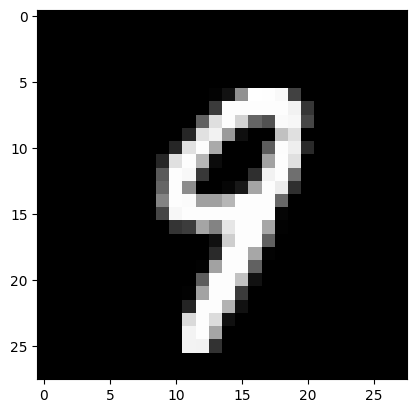

index: 5129
Label: 3


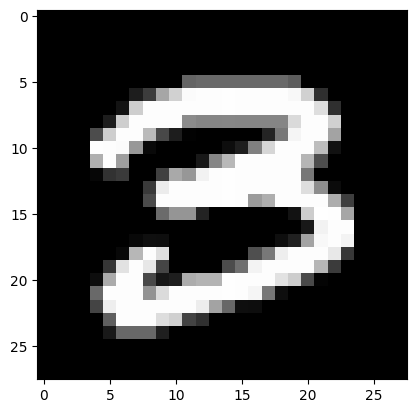

index: 3943
Label: 3


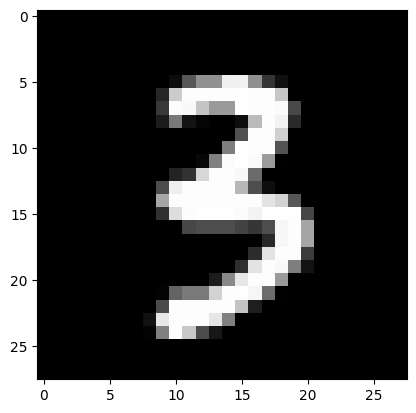

index: 5619
Label: 8


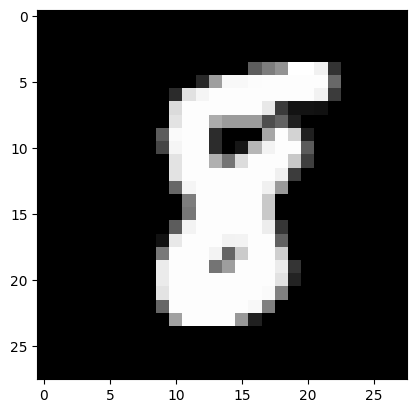

index: 4635
Label: 9


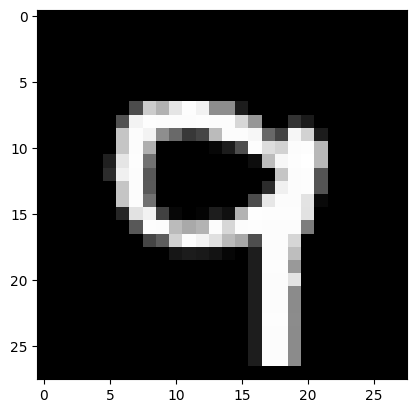

index: 4908
Label: 7


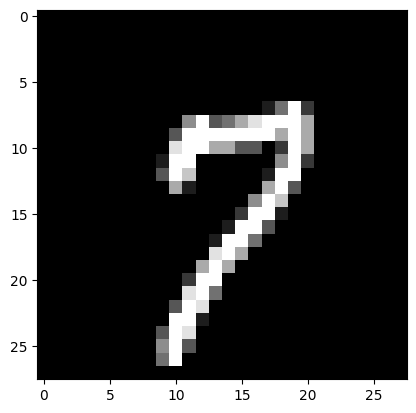

index: 4383
Label: 8


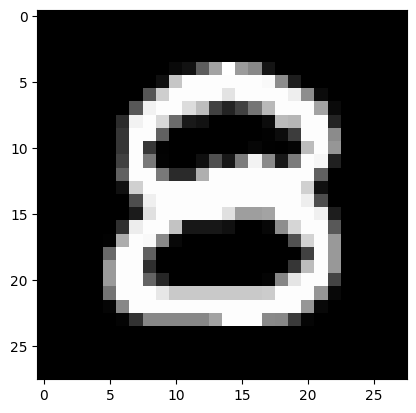

index: 4258
Label: 8


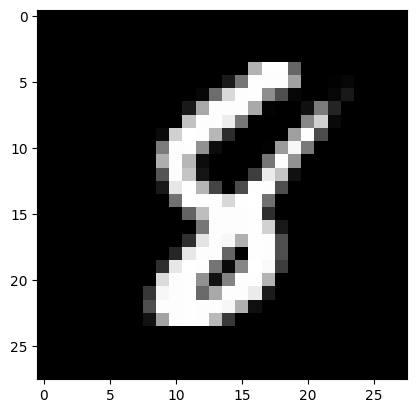

index: 3302
Label: 8


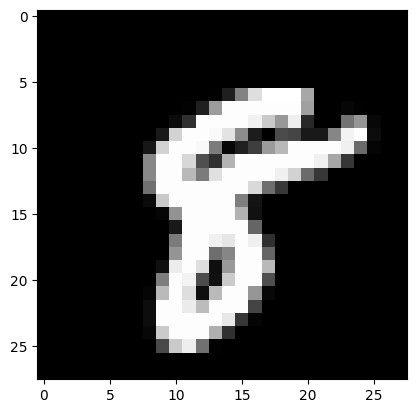

index: 3520
Label: 9


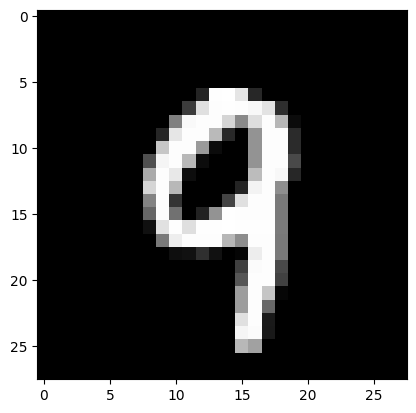

___________________
Randomly printing 10 images with labels from testing dataset
index: 2407
Label: 4


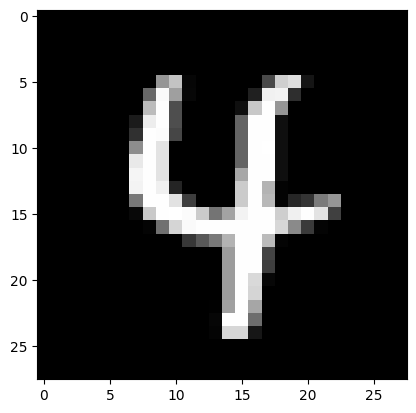

index: 4401
Label: 2


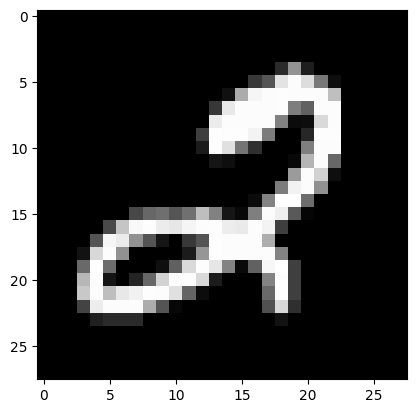

index: 2450
Label: 9


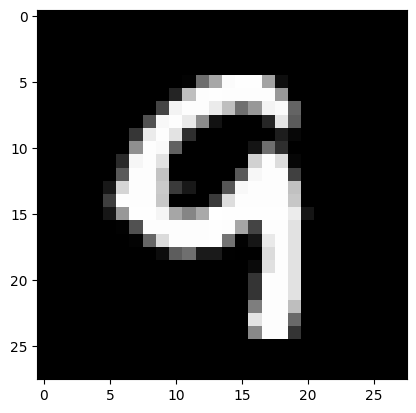

index: 840
Label: 5


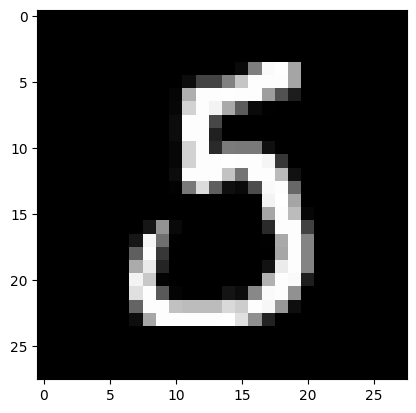

index: 1731
Label: 1


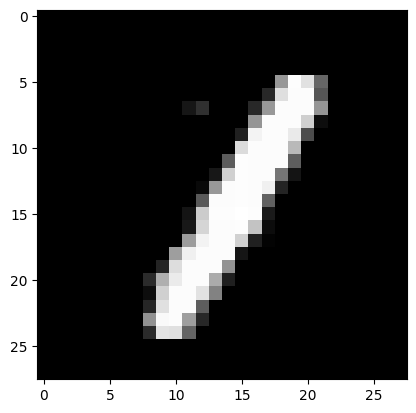

index: 2683
Label: 9


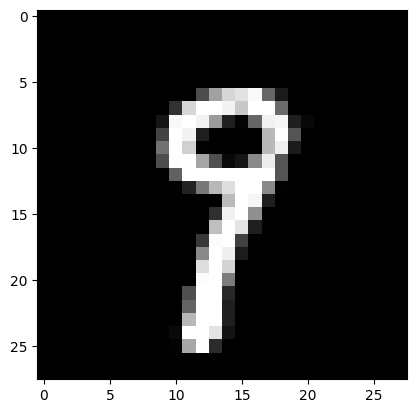

index: 3147
Label: 1


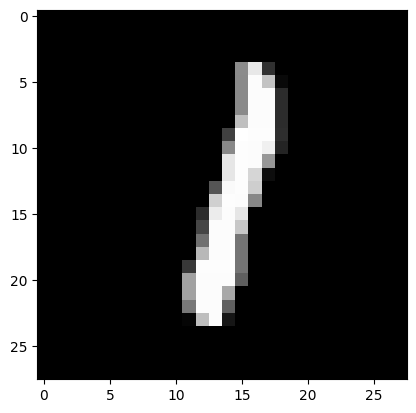

index: 5644
Label: 8


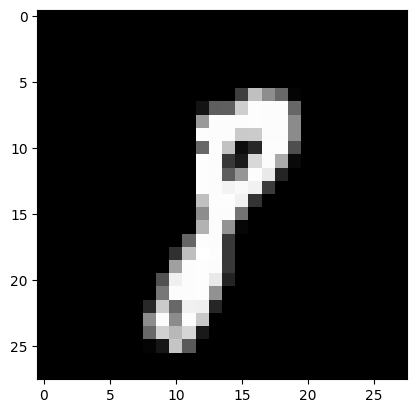

index: 776
Label: 7


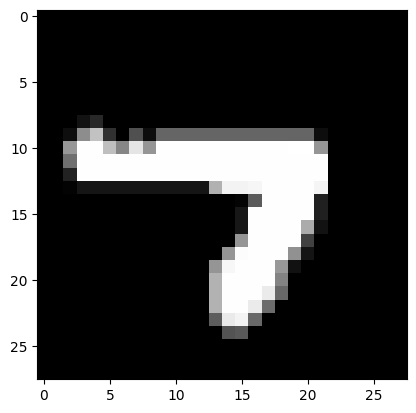

index: 212
Label: 9


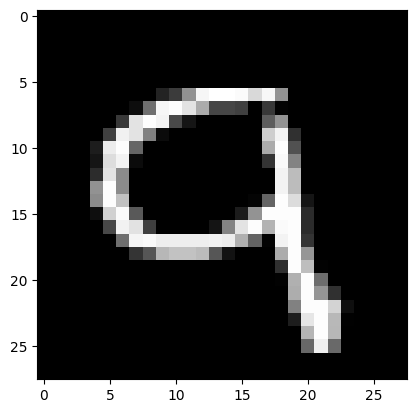

_____________


In [39]:
# Validation of Task

# Checking the shape of first image in new training dataset
print(new_dataset[0][0].shape)
print("___________________")




# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in training dataset for",len(new_dataset[1][0]),"images in training dataset")
print("___________________")
# Excepted output
# There are 6000 labels in training dataset for 6000 images in training dataset
# There are 1000 labels in training dataset for 1000 images in training dataset








# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))
print("___________________")
# Expected output
# There are 10 unique classes in training dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 600,
#          1: 600,
#          2: 600,
#          3: 600,
#          4: 600,
#          5: 600,
#          6: 600,
#          7: 600,
#          8: 600,
#          9: 600})
# There are 10 unique classes in validation dataset
# Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)
# Counter({0: 100,
#          1: 100,
#          2: 100,
#          3: 100,
#          4: 100,
#          5: 100,
#          6: 100,
#          7: 100,
#          8: 100,
#          9: 100})




# Checking the correctness of indexing of image and its labels
print("Randomly printing 10 images with labels from training dataset")
display_random_images_with_labels(new_dataset[0])
print("___________________")
print("Randomly printing 10 images with labels from testing dataset")
display_random_images_with_labels(new_dataset[0])
print("_____________")